In [4]:
import torch
import matplotlib.pyplot as plt

In [5]:
img_base = torch.load("./img_base.pt")
img_our = torch.load("./img_our.pt")


2
tensor([[False, False, False,  ..., False, False, False],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        ...,
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True]])


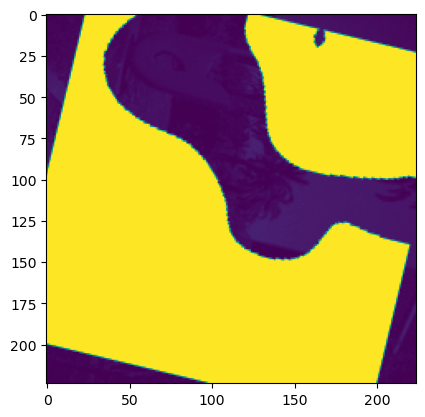

In [21]:
plt.imshow(img_base[4].squeeze().sum(0))
print(len(torch.where(img_base[4].squeeze().sum(0) == 0)))

# len(torch.where(img_base[7].sum(0) == 0)[0])
print(img_base[5].squeeze().sum(0) == 0)

2


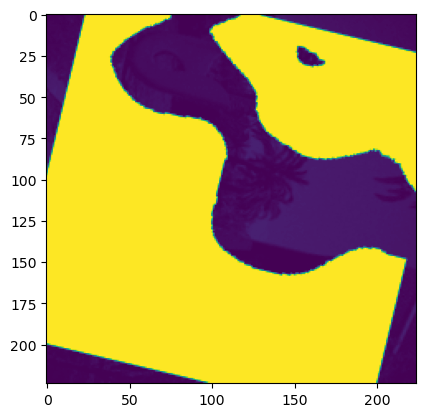

In [20]:
plt.imshow(img_our[4].squeeze().sum(0))

print(len(torch.where(img_our[4].squeeze().sum(0) == 0)))


In [68]:
img_base_spatial = torch.load("./img_base_spatial.pt")
img_our_spatial = torch.load("./img_our_spatial.pt")

2


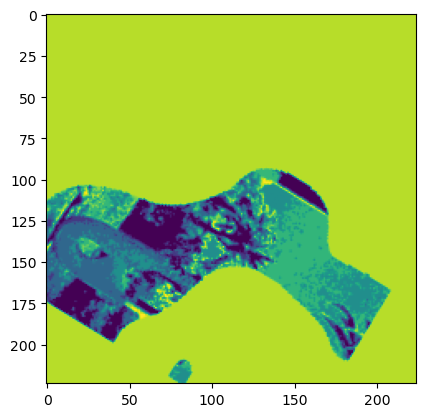

In [72]:
plt.imshow(img_base_spatial[7].squeeze().sum(0))
print(len(torch.where(img_base_spatial[7].squeeze().sum(0) == 0)))



2


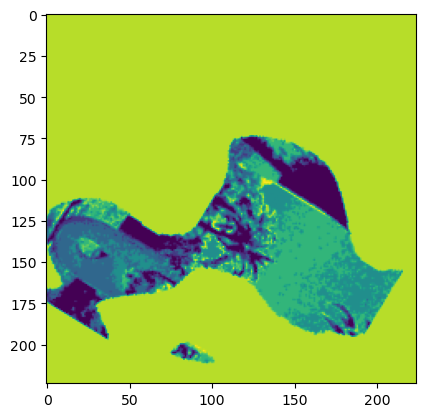

In [71]:
plt.imshow(img_our_spatial[7].squeeze().sum(0))

print(len(torch.where(img_our_spatial[7].squeeze().sum(0) == 0)))


In [51]:
from transform_factory import get_trivial_augment

In [52]:
T_spatial = get_trivial_augment(aopc=True, trans_opt='spatial')

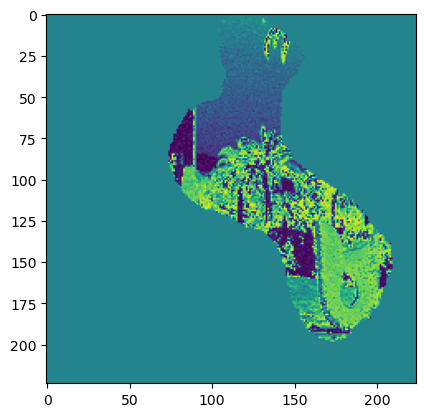

In [53]:
plt.imshow(T_spatial(img_our[5]).sum(0))

In [184]:
from PIL import Image
from transform_factory import get_trivial_augment, resize_322, center_crop_224
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
from expl import ExplFactory
from torchvision.models import resnet50, ResNet50_Weights

In [162]:
orig_img = center_crop_224(resize_322(Image.open("/home/juhyeon/Imagenet/val/n04127249/ILSVRC2012_val_00024718.JPEG")))

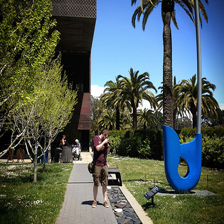

In [179]:
T = get_trivial_augment(noise_std=0.05)

# to_pil_image(T(orig_img))
orig_img

In [187]:
model = resnet50(weights = ResNet50_Weights.DEFAULT).eval().cuda()
    
expl_func = ExplFactory()
expl_func = expl_func.get_explainer(model, "GradCAM", upsample=False)

In [198]:
expl_func(T(orig_img).unsqueeze(0).cuda(), 772)

(tensor([[[[-1.3859e-02, -9.1026e-03,  1.7330e-01,  2.6964e-01,  3.4937e-01,
             3.8598e-01,  2.7205e-01],
           [-5.4411e-03,  2.0327e-01,  2.9260e-01,  4.0244e-01,  5.5723e-01,
             3.6809e-01,  2.4131e-01],
           [ 5.0556e-02,  1.8753e-01,  3.6221e-01,  5.7662e-01,  4.4565e-01,
             2.6322e-01,  2.2235e-01],
           [ 2.2863e-02,  1.6977e-01,  3.1827e-01,  4.5369e-01,  5.1998e-01,
             7.0232e-01,  3.4063e-01],
           [-5.3419e-03,  7.8135e-02,  2.5952e-01,  2.3201e-01,  4.6186e-01,
             6.6787e-01,  3.8171e-01],
           [-1.6637e-03, -7.5952e-04,  1.1330e-01, -5.5265e-02,  5.7172e-01,
             1.2406e+00,  7.2682e-01],
           [-3.8526e-03,  2.8431e-02,  5.8102e-02, -5.1469e-02,  1.9453e-01,
             4.3830e-01,  2.0453e-01]]]], device='cuda:0',
        grad_fn=<SumBackward1>),
 tensor(772, device='cuda:0'))